# Comparing Austin's Demographics to Other Large Cities
Data 608 Final Project

Presentation: https://youtu.be/ETRWh8xzLhw

## Introduction

The Austin metro area is the fastest growing large city in America accoriding to [Forbes](https://www.forbes.com/pictures/mlj45hfdf/1-austin-texas/#231ccdfa56d0). The city's growth has mainly been fueled by the rapid growth in its technology sector, similar to the Bay Area in earlier decades. It hasn't been all rosy. Much like the Bay Area, Austin made the list of the ten cities with the largest income inequality according to [Time Magazine](http://time.com/money/4755758/income-inequality-best-worst-cities/), so I wanted to investiage further.

For the project, I looked at four different factors in regards to race and income:
- Demographic shift over the last four censuses
- Homeownership by Race between 1990 and 2009
- Percentage of Same Race Neighbors between 1990 and 2009
- Income in Same Race Neighbors between 1990 and 2009

To me, San Francisco Metro (i.e. Bay Area) is an example of a city that hasn't grown equitably, meaning only one portion of its population is enjoying success, while others are still left in poverty. I also wanted to compare it Houston, another Texas city that has seen massive growth over the last few decades, and also New York City. All of the data was taken from the [Diversity and Disparities](https://s4.ad.brown.edu/projects/diversity/Data/data.htm#WP) site from Brown University's Russell Sage Foundation.

## Demographics

I'll start off by taking a look at demogrpahic shifts. The code below produces a series of pie charts for each city for the last four censuses:

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

from pandas.tools.plotting import table

In [87]:
def demographic_data(filepath):
    data_file = open(filepath, "r")
    lines= (data_file.read()).split("\n")
    
    white = []
    hispanic = []
    african_american = []
    asian = []
    other = []
    
    for line in lines:
        props = line.split(" ")
        #print(props)
        
        white.append(int(props[2]))
        african_american.append(int(props[3]))
        hispanic.append(int(props[4]))
        asian.append(int(props[5]))
        other.append(int(props[6]))
        
    return [white, african_american, hispanic, asian, other]

In [129]:
def generate_demographic_chart(filepath, title):
    dem_data = demographic_data(filepath)
    
    df = pd.DataFrame({
                    'White':dem_data[0],
                    'Black':dem_data[1],
                    'Hispanic':dem_data[2],
                    'Asian':dem_data[3],
                    'Other':dem_data[4]
                  }, index=['1980','1990','2000', '2010'])
    df.T.plot.pie(subplots=True, figsize=(12, 3), legend=False, title=title)

In [93]:
austin_demographics = demographic_data("data/demographics/austin.data")
austin_demographics

[[232324, 287166, 347554, 385271],
 [41591, 55824, 67117, 65227],
 [64766, 106868, 200579, 277707],
 [3417, 13584, 34330, 55893],
 [3398, 2180, 6982, 6292]]

In [94]:
df = pd.DataFrame({
                    'White':austin_demographics[0],
                    'Black':austin_demographics[1],
                    'Hispanic':austin_demographics[2],
                    'Asian':austin_demographics[3],
                    'Other':austin_demographics[4]
                  }, index=['1980','1990','2000', '2010'])

In [95]:
print (df)

      Asian  Black  Hispanic  Other   White
1980   3417  41591     64766   3398  232324
1990  13584  55824    106868   2180  287166
2000  34330  67117    200579   6982  347554
2010  55893  65227    277707   6292  385271


### Austin

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018ABAC1C128>,
      dtype=object)

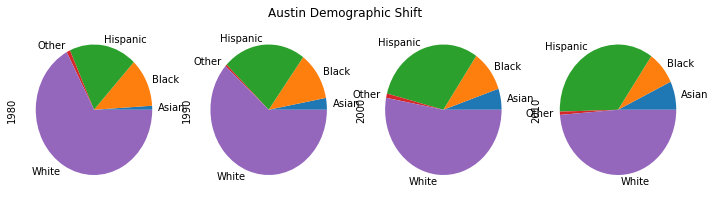

In [109]:
df.T.plot.pie(subplots=True, figsize=(12, 3), legend=False, title="Austin Demographic Shift")

###  San Francisco

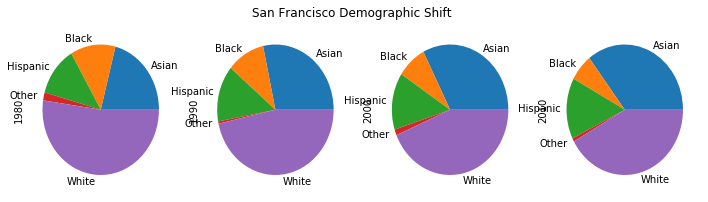

In [130]:
generate_demographic_chart("data/demographics/san_fran.data", "San Francisco Demographic Shift")

### Houston

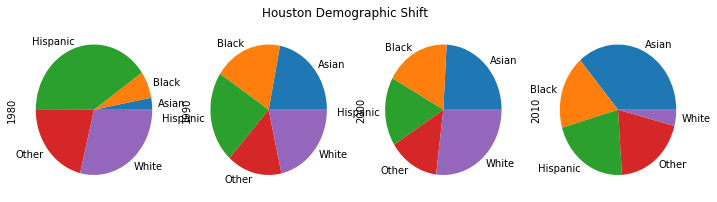

In [111]:
generate_demographic_chart("data/demographics/houston.data", "Houston Demographic Shift")

### New York City

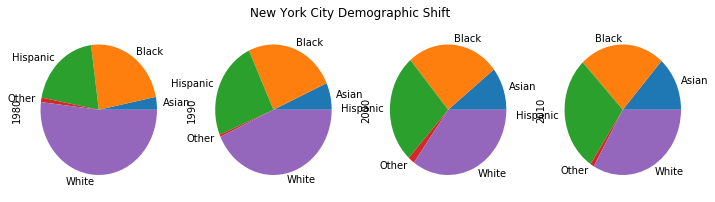

In [114]:
generate_demographic_chart("data/demographics/nyc.data", "New York City Demographic Shift")

### Observations

The demographic trends for Austin are somewhat similar to San Francisco. The factor that is the most noticeable is the fact that the Asian population went from just 3,417 people in 1980 to 55,893 in 2010. Also, Houston is by far the most diverse city of the four cities, with no group holding a simple majority.

# Same Race Neighborhors


The code below takes the same race neighbors data for each core demographic and creates a series of line graphs for them. These graphs are important because they are a nice indicator of how segregated each city is over time. 

In [95]:
def generate_same_race(citypath):
    city = pd.read_csv(citypath)
    city.set_index('Year')
    
    city.set_index('Year', inplace=True)
    return city

In [96]:
def gen_same_race_graph(austin, nyc, houston, san_fran, label, title):
    yx = ['1990', '2000', '2009']

    fig, axes = plt.subplots(nrows=4, ncols=4)
    fig.tight_layout()
    fig.set_size_inches(10, 5)

    plt.subplot(2, 2, 1)
    plt.plot(austin[label], yx, color="red")
    plt.title('Austin')
    plt.ylabel('Years')
    plt.xlabel('Percentage')


    plt.subplot(2, 2, 2)
    plt.plot(nyc[label], yx)
    plt.title('New York City')
    plt.ylabel('Years')
    plt.xlabel('Percentage')

    plt.subplot(2, 2, 3)
    plt.plot(houston[label], yx, color="orange")
    plt.title('Houston')
    plt.ylabel('Years')
    plt.xlabel('Percentage')

    plt.subplot(2, 2, 4)
    plt.plot(san_fran[label], yx, color="green")
    plt.title('San Francisco')
    plt.ylabel('Years')
    plt.xlabel('Percentage')

    fig.suptitle(title, fontsize=15)
    fig.subplots_adjust(top=0.88)

    plt.show()

In [8]:
austin = pd.read_csv("data/srn/austin.csv")
austin.set_index('Year')

,White,Black,Hispanic,Asian
Year,,,,
1990,73.9,22.1,28.3,4.0
2000,68.3,15.9,35.4,6.0
2009,63.9,12.5,38.7,7.2


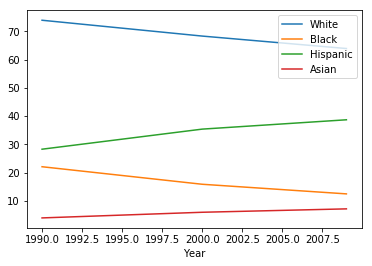

In [9]:
austin.set_index('Year', inplace=True)
austin.plot(legend=True)
plt.show()

In [69]:
# Pull in same race data for the other three cities
nyc = generate_same_race("data/srn/nyc.csv")
houston = generate_same_race("data/srn/houston.csv")
san_fran = generate_same_race("data/srn/san_fran.csv")

In [70]:
nyc

,White,Black,Hispanic,Asian
Year,,,,
1990,79.5,53.6,36.6,14.2
2000,73.1,52.0,39.6,18.9
2009,70.3,47.8,39.6,22.0


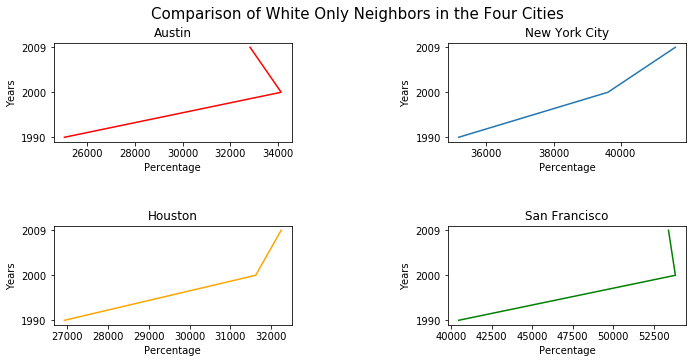

In [169]:
gen_same_race_graph(austin, nyc, houston, san_fran, 'White', "Comparison of White Only Neighbors in the Four Cities")

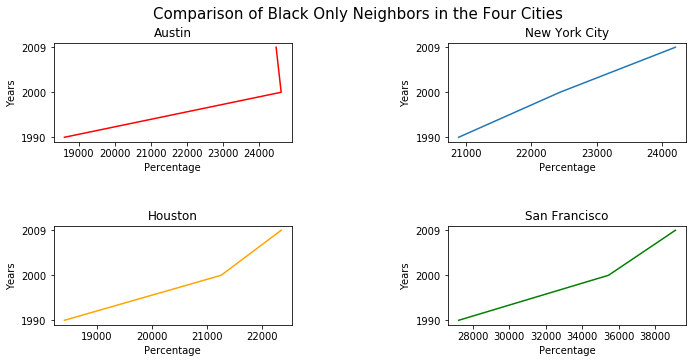

In [170]:
gen_same_race_graph(austin, nyc, houston, san_fran, 'Black', "Comparison of Black Only Neighbors in the Four Cities")

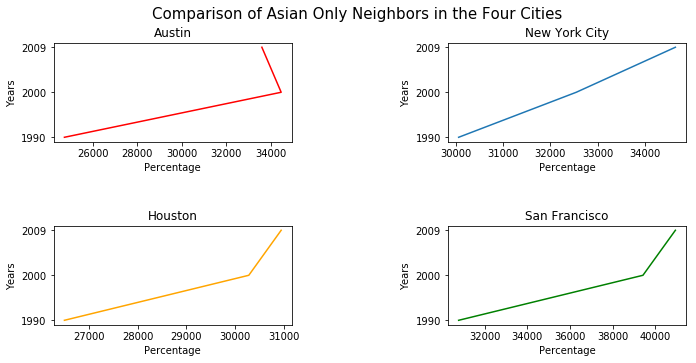

In [171]:
gen_same_race_graph(austin, nyc, houston, san_fran, 'Asian', "Comparison of Asian Only Neighbors in the Four Cities")

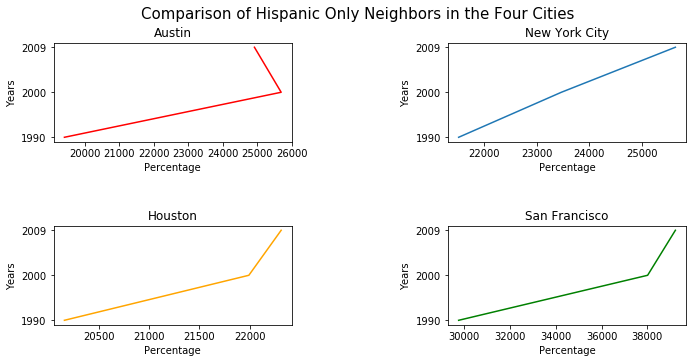

In [173]:
gen_same_race_graph(austin, nyc, houston, san_fran, 'Hispanic', "Comparison of Hispanic Only Neighbors in the Four Cities")

### Analysis

The trend for Austin here is actually quite good. In all four metrics, Austin is showing a decrease in the most recent census in Same Race Neighbors, while the other three cities all show massive spikes in the last dataset. 

## Income in Same Race Neighbors

The next dataset I chose to analyze is the income levels of people that live in those Same Race Neighbor neighborhoods. This would be another great indicator of racial segregation since poorer people of the same race would choose to live next to another, instead of people of other races. 

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

def generate_income_chart(label, set1, set2, set3): 
    n_groups = 4
    fig, ax = plt.subplots()

    index = np.arange(n_groups)
    bar_width = 0.25

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = ax.bar(index, set1, bar_width,
                    alpha=opacity, color='b',
                    error_kw=error_config,
                    label='1990')

    rects2 = ax.bar(index + bar_width, set2, bar_width,
                    alpha=opacity, color='r',
                    error_kw=error_config,
                    label='2000')

    rects3= ax.bar(index + 2*bar_width, set3, bar_width,
                    alpha=opacity, color='y',
                    error_kw=error_config,
                    label='2009')

    ax.set_xlabel('Income')
    ax.set_ylabel('City')
    ax.set_title('Per Capital Income by {} Population Living in Same Race Neighborhood by Year'.format(labelNeighbors))
    ax.set_xticks(index + bar_width / 3)
    ax.set_xticklabels(('Austin', 'New York City', 'Houston', 'San Francisco'))
    ax.legend()

    fig.tight_layout()
    fig.set_size_inches(12, 5)
    plt.show()

In [99]:
# Pull in cities in the same way as SRN
austin = generate_same_race("data/income/austin.csv")
nyc = generate_same_race("data/income/nyc.csv")
houston = generate_same_race("data/income/houston.csv")
san_fran = generate_same_race("data/income/san_fran.csv")

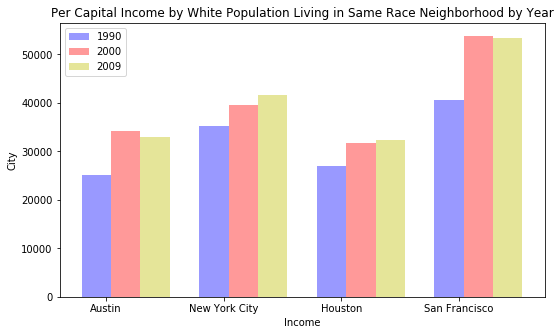

In [168]:
white_1990 = (
    austin['White'][1990],
    nyc['White'][1990],
    houston['White'][1990],
    san_fran['White'][1990]
)

white_2000 = (
    austin['White'][2000],
    nyc['White'][2000],
    houston['White'][2000],
    san_fran['White'][2000]
)

white_2009 = (
    austin['White'][2009],
    nyc['White'][2009],
    houston['White'][2009],
    san_fran['White'][2009]
)

generate_income_chart(
    'White',
    white_1990,
    white_2000,
    white_2009
)

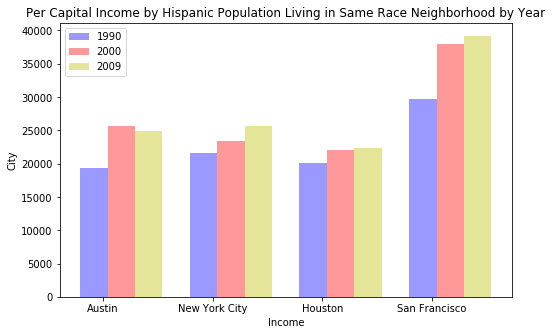

In [167]:
hispanic_1990 = (
    austin['Hispanic'][1990],
    nyc['Hispanic'][1990],
    houston['Hispanic'][1990],
    san_fran['Hispanic'][1990]
)

hispanic_2000 = (
    austin['Hispanic'][2000],
    nyc['Hispanic'][2000],
    houston['Hispanic'][2000],
    san_fran['Hispanic'][2000]
)

hispanic_2009 = (
    austin['Hispanic'][2009],
    nyc['Hispanic'][2009],
    houston['Hispanic'][2009],
    san_fran['Hispanic'][2009]
)

generate_income_chart(
    'Hispanic',
    hispanic_1990,
    hispanic_2000,
    hispanic_2009
)

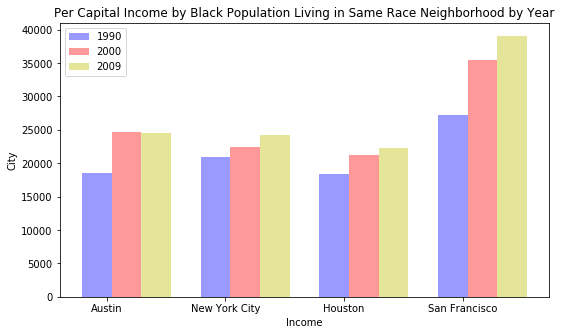

In [166]:
black_1990 = (
    austin['Black'][1990],
    nyc['Black'][1990],
    houston['Black'][1990],
    san_fran['Black'][1990]
)

black_2000 = (
    austin['Black'][2000],
    nyc['Black'][2000],
    houston['Black'][2000],
    san_fran['Black'][2000]
)

black_2009 = (
    austin['Black'][2009],
    nyc['Black'][2009],
    houston['Black'][2009],
    san_fran['Black'][2009]
)

generate_income_chart(
    'Black',
    black_1990,
    black_2000,
    black_2009
)

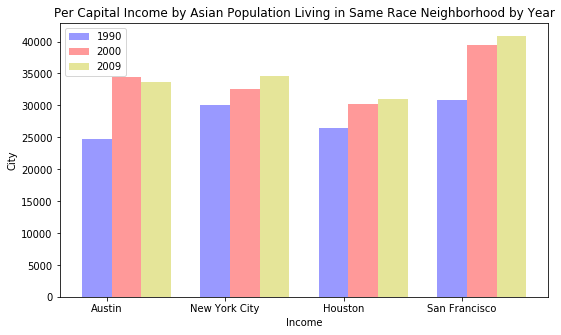

In [165]:
asian_1990 = (
    austin['Asian'][1990],
    nyc['Asian'][1990],
    houston['Asian'][1990],
    san_fran['Asian'][1990]
)

asian_2000 = (
    austin['Asian'][2000],
    nyc['Asian'][2000],
    houston['Asian'][2000],
    san_fran['Asian'][2000]
)

asian_2009 = (
    austin['Asian'][2009],
    nyc['Asian'][2009],
    houston['Asian'][2009],
    san_fran['Asian'][2009]
)

generate_income_chart(
    'Asian',
    asian_1990,
    asian_2000,
    asian_2009
)

### Analysis

Austin seemed to have been affected by the Great Recession, while the other three cities weren't affected as Austin was the only city of the four that showed a decrease in average income in 2009 compared to 2000. What's more alarming is that all four cities showed per capita income far below the US averages for all three census years. For example, the average income for a family in 2009 [was roughly 56,000 dollars](https://en.wikipedia.org/wiki/Household_income_in_the_United_States#/media/File:US_Real_Household_Median_Income_thru_2014.png), but none of the SRN households came close to that number.

# Homeownership

The last statistic I looked at was homeownership as it has always been a key statistic to measure progress in the United States.

In [83]:
# Pull in cities in the same way as SRN
austin = generate_same_race("data/homeownership/austin.csv")
nyc = generate_same_race("data/homeownership/nyc.csv")
houston = generate_same_race("data/homeownership/houston.csv")
san_fran = generate_same_race("data/homeownership/san_fran.csv")

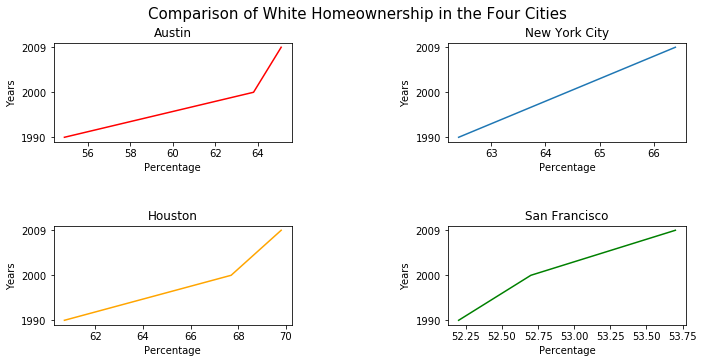

In [93]:
gen_same_race_graph(austin, nyc, houston, san_fran, 'White', "Comparison of White Homeownership in the Four Cities")

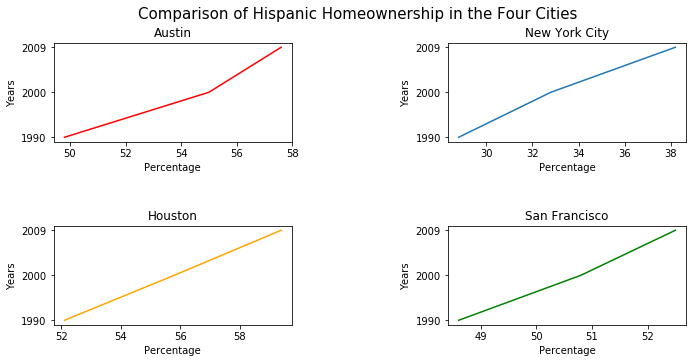

In [94]:
gen_same_race_graph(austin, nyc, houston, san_fran, 'Hispanic', "Comparison of Hispanic Homeownership in the Four Cities")

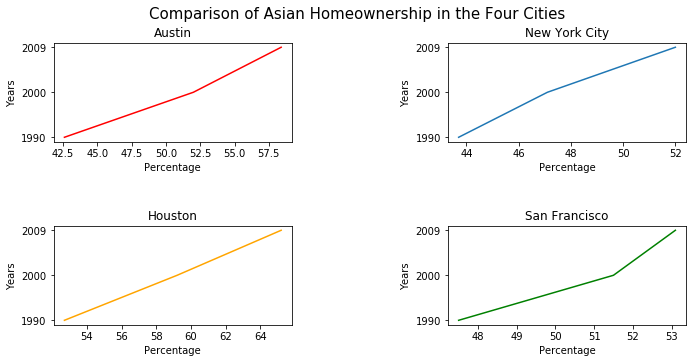

In [97]:
gen_same_race_graph(austin, nyc, houston, san_fran, 'Asian', "Comparison of Asian Homeownership in the Four Cities")

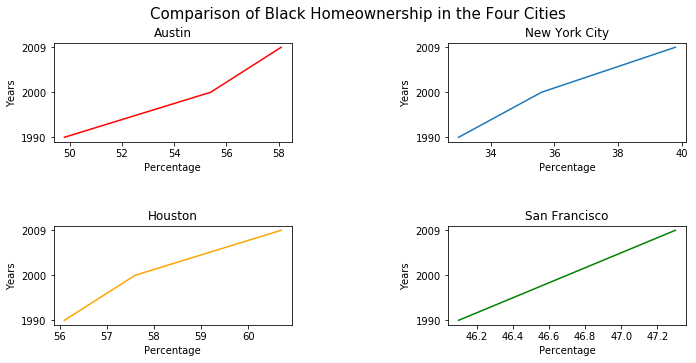

In [98]:
gen_same_race_graph(austin, nyc, houston, san_fran, 'Black', "Comparison of Black Homeownership in the Four Cities")

### Analysis
Homeownership number look very strong for all three cities. The factor to keep in mind is that the last dataset I had access to was 2009, right when the Great Recession was happening. It would have been more interesting to see what the number look like for 2018, which would be a decade after the recession.

## Conclusion

Overall, this was an interesting study. I came in thinking that Austin would have far more inequality than what the statitics seem to show. While it should be alarming that factor's such as Same Race Neighbors are increasing rapidly in three of the four cities I looked at, I am pleased to see that Austin bucked that trend. 